## 第一步 数据特征选择 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False
import warnings
# 忽略所有警告
warnings.filterwarnings("ignore")
df = pd.read_excel('岩心数据-POR-DATASET-sample.xlsx')
df

,DEPTH,LABEL,AC,CNL,DEN,CAL,GR,SP,PE,R25,RMG,RT,AT90,POR_data
0,1710.39,0,330.783,31.119,2.146,21.742,56.680,161.908,1.975,5.275,2.972,10.090,10.090,28.7
1,1710.42,0,330.594,30.832,2.148,21.726,56.114,161.885,1.976,5.346,2.999,10.263,10.263,29.4
2,1710.49,0,329.816,30.279,2.147,21.686,55.371,161.827,1.976,5.516,3.051,10.615,10.615,30.3
3,1710.54,0,329.211,29.889,2.147,21.663,54.732,161.798,1.976,5.638,3.108,10.869,10.869,29.5
4,1710.57,0,329.152,29.989,2.146,21.649,54.568,161.780,1.973,5.729,3.142,11.017,11.017,29.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1906.45,1,326.138,26.589,2.171,22.761,70.390,171.739,2.795,6.451,4.081,8.409,8.409,15.1
139,1906.86,1,314.403,19.469,2.273,23.283,83.995,172.739,3.029,5.367,3.837,6.248,6.248,10.8
140,1907.04,1,304.124,18.737,2.339,23.461,85.003,173.080,3.146,4.985,3.731,5.800,5.800,14.0
141,1907.25,1,293.962,19.159,2.370,23.619,81.870,173.395,3.126,4.945,3.328,5.600,5.600,8.5


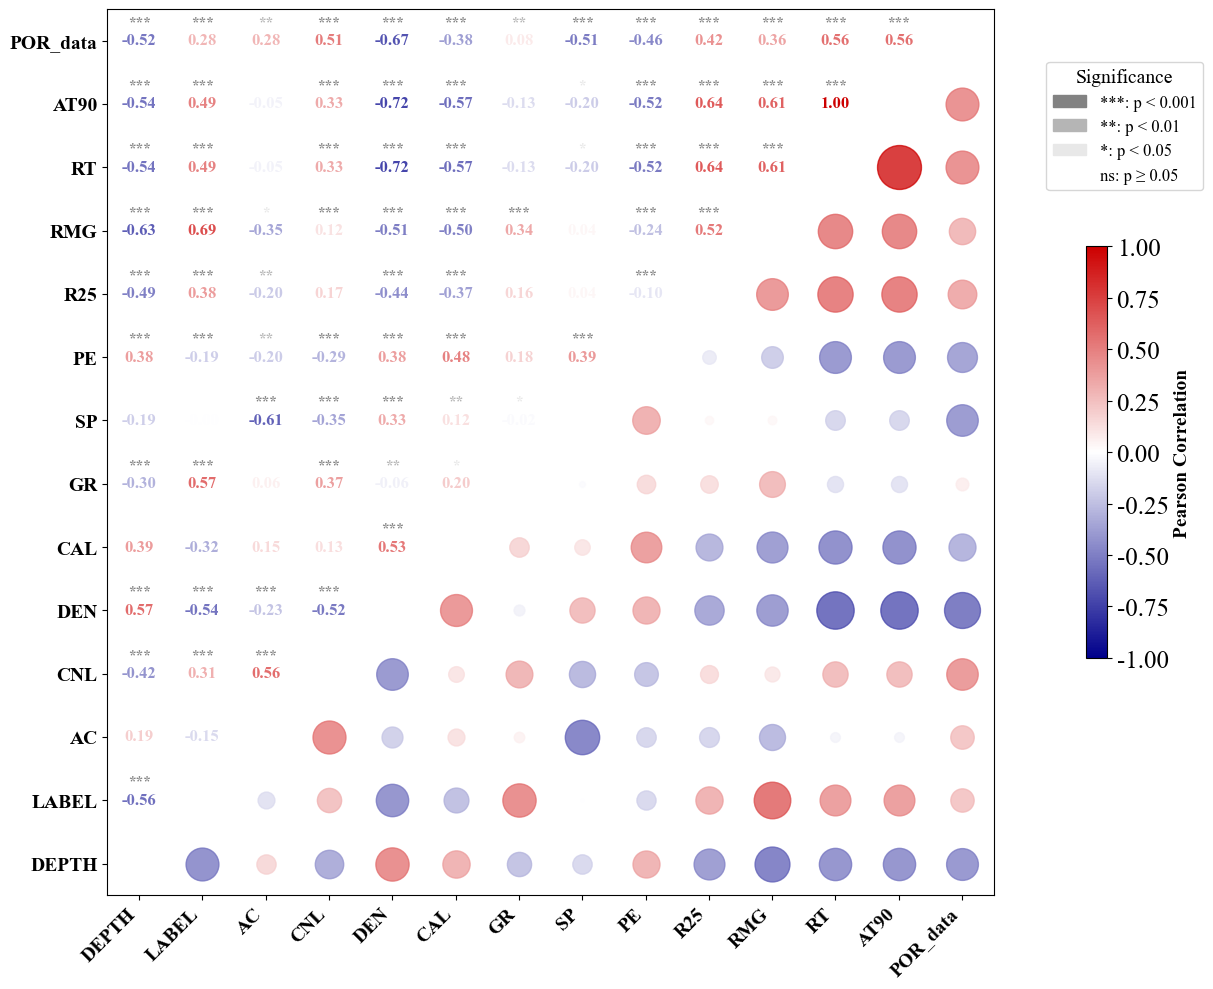

In [2]:

import scipy.stats as stats
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

# 计算相关系数矩阵和 p 值矩阵
corr = df.corr()
p_values = pd.DataFrame(np.zeros_like(corr), columns=corr.columns, index=corr.index)

# 计算每个相关系数的 p 值
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if i > j:
            _, p_value = stats.spearmanr(df.iloc[:, i], df.iloc[:, j])
            p_values.iloc[i, j] = p_value
            p_values.iloc[j, i] = p_value

# 根据 p 值生成显著性符号
def significance_symbol(p):
    if p < 0.001:
        return '***', 0  # 0 代表颜色映射
    elif p < 0.01:
        return '**', 1
    elif p < 0.05:
        return '*', 2
    else:
        return 'ns', 3

# 创建图形
fig, ax = plt.subplots(figsize=(12, 10))

# 创建红蓝渐变的颜色映射
cmap = LinearSegmentedColormap.from_list(
    "red_blue", ["#00008B", "white", "#CD0000"], N=256
)

norm = plt.Normalize(vmin=-1, vmax=1)

# 创建显著性符号的颜色映射（使用灰色）
significance_cmap = LinearSegmentedColormap.from_list(
    "significance", ['#828282', '#B5B5B5', '#E8E8E8', 'none'], N=4
)

# 绘制气泡图和数值
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if i > j:  # 对角线左下部分，显示气泡
            color = cmap(norm(corr.iloc[i, j]))
            scatter = ax.scatter(i, j, s=np.abs(corr.iloc[i, j]) * 1000, color=color, alpha=0.75)
        elif i < j:  # 对角线右上部分，显示相关系数数值
            color = cmap(norm(corr.iloc[i, j]))
            ax.text(i, j, f'{corr.iloc[i, j]:.2f}', ha='center', va='center', color=color, fontsize=12, fontweight='bold')  # 使用颜色映射
            # 在数值上方显示显著性符号
            significance, significance_idx = significance_symbol(p_values.iloc[i, j])
            significance_color = significance_cmap(significance_idx)  # 显著性符号的颜色
            ax.text(i, j + 0.3, significance, ha='center', va='center', fontsize=11, color=significance_color, fontweight='bold')  # 使用颜色映射


# 设置坐标轴标签
ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right', fontsize=14, fontweight='bold')  # 设置字体加粗和增大
ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns, fontsize=14, fontweight='bold')  # 设置字体加粗和增大

# 设置 x 和 y 轴的比例相同
ax.set_aspect('equal')

# 强制使 x 轴和 y 轴的范围相同
ax.set_xlim(-0.5, len(corr.columns) - 0.5)
ax.set_ylim(-0.5, len(corr.columns) - 0.5)

# 关闭网格线
ax.grid(False)

# 添加显著性符号图例，去掉多余的空格，使图例更加紧凑
legend_labels = ['***: p < 0.001', '**: p < 0.01', '*: p < 0.05', 'ns: p ≥ 0.05']
legend_handles = [
    mpatches.Patch(color='#828282', label=legend_labels[0]),  # 对应颜色
    mpatches.Patch(color='#B5B5B5', label=legend_labels[1]),
    mpatches.Patch(color='#E8E8E8', label=legend_labels[2]),
    mpatches.Patch(color='none', label=legend_labels[3]),
]

# 将图例移到外部右边，并使其更紧凑
ax.legend(handles=legend_handles, title="Significance", fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1.05, 0.95), handlelength=2)

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# 创建颜色条，并调整其位置
cbar = fig.colorbar(sm, ax=ax, fraction=0.02, pad=0.09)  # 通过fraction和pad微调
cbar.set_label('Pearson Correlation', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=18)
# 展示图形并保存
plt.tight_layout()
plt.savefig("corr_3.pdf", format='pdf', bbox_inches='tight', dpi=1200)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split, KFold
yanxin_data = df.copy()
X = df.drop(['DEPTH','POR_data'],axis=1)
y = df['POR_data']
z = df['LABEL']
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, stratify=z)##创新点一：解决小样本学习，对每口井的类别按照比例划分，最后总的为7:3
X   

,LABEL,AC,CNL,DEN,CAL,GR,SP,PE,R25,RMG,RT,AT90
0,0,330.783,31.119,2.146,21.742,56.680,161.908,1.975,5.275,2.972,10.090,10.090
1,0,330.594,30.832,2.148,21.726,56.114,161.885,1.976,5.346,2.999,10.263,10.263
2,0,329.816,30.279,2.147,21.686,55.371,161.827,1.976,5.516,3.051,10.615,10.615
3,0,329.211,29.889,2.147,21.663,54.732,161.798,1.976,5.638,3.108,10.869,10.869
4,0,329.152,29.989,2.146,21.649,54.568,161.780,1.973,5.729,3.142,11.017,11.017
...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,326.138,26.589,2.171,22.761,70.390,171.739,2.795,6.451,4.081,8.409,8.409
139,1,314.403,19.469,2.273,23.283,83.995,172.739,3.029,5.367,3.837,6.248,6.248
140,1,304.124,18.737,2.339,23.461,85.003,173.080,3.146,4.985,3.731,5.800,5.800
141,1,293.962,19.159,2.370,23.619,81.870,173.395,3.126,4.945,3.328,5.600,5.600


In [16]:
from tabpfn import TabPFNRegressor
# 初始化TabPFN回归模型
model = TabPFNRegressor()

# 训练模型
model.fit(X_train, y_train)

TabPFNRegressor()

In [17]:
from sklearn import metrics

# 预测
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_pred_train_list = y_pred_train.tolist()
y_pred_test_list = y_pred_test.tolist()

# 计算训练集的指标
mse_train = metrics.mean_squared_error(y_train, y_pred_train_list)
rmse_train = np.sqrt(mse_train)
mae_train = metrics.mean_absolute_error(y_train, y_pred_train_list)
r2_train = metrics.r2_score(y_train, y_pred_train_list)

# 计算测试集的指标
mse_test = metrics.mean_squared_error(y_test, y_pred_test_list)
rmse_test = np.sqrt(mse_test)
mae_test = metrics.mean_absolute_error(y_test, y_pred_test_list)
r2_test = metrics.r2_score(y_test, y_pred_test_list)

print("训练集评价指标:")
print("均方误差 (MSE):", mse_train)
print("均方根误差 (RMSE):", rmse_train)
print("平均绝对误差 (MAE):", mae_train)
print("拟合优度 (R-squared):", r2_train)
print(f'-------------------------')
print("\n测试集评价指标:")
print("均方误差 (MSE):", mse_test)
print("均方根误差 (RMSE):", rmse_test)
print("平均绝对误差 (MAE):", mae_test)
print("拟合优度 (R-squared):", r2_test)

训练集评价指标:
均方误差 (MSE): 4.431648386485566
均方根误差 (RMSE): 2.105148067591818
平均绝对误差 (MAE): 1.4371832100677489
拟合优度 (R-squared): 0.9210981622000964
-------------------------

测试集评价指标:
均方误差 (MSE): 7.810290671826244
均方根误差 (RMSE): 2.7946897272910713
平均绝对误差 (MAE): 1.7517468850778979
拟合优度 (R-squared): 0.8607867552589931


## 第二步，泥岩段预处理

In [4]:
df_ni = pd.read_excel('总泥岩段.xlsx')
column_names1=[	'AC',	'CNL',	'DEN'	,	'CAL',	'GR',	'SP',		'PE',		'R25',	'RMG',	'RT',	'AT90'
]
df_ni=df_ni.drop(columns=['DEPTH'])
df_ni.isnull().sum()

LABEL    0
AC       0
CNL      0
DEN      0
CAL      0
GR       0
SP       0
PE       0
R25      0
RMG      0
RT       0
AT90     0
dtype: int64

In [5]:
df_ni.describe()

,LABEL,AC,CNL,DEN,CAL,GR,SP,PE,R25,RMG,RT,AT90
count,16794.0,16794.000000,16794.000000,16794.000000,16794.000000,16794.000000,16794.000000,16794.00000,16794.000000,16794.000000,16794.000000,16794.000000
mean,2.0,315.967957,32.063293,2.344641,23.873182,80.747633,171.302533,2.78973,3.913558,1.980614,3.727494,3.727494
std,0.0,58.913124,8.523891,0.110310,1.940076,16.131902,11.310671,0.64326,3.548626,1.142417,2.425761,2.425761
min,2.0,-151.884000,6.093000,1.655000,20.559000,24.096000,138.207000,1.17600,0.576000,-0.529000,1.545000,1.545000
25%,2.0,298.833500,26.273000,2.284000,22.576000,71.044000,168.143500,2.44600,2.776000,1.273000,2.733000,2.733000
50%,2.0,318.721500,30.846000,2.354000,23.345000,80.492500,177.161000,2.65800,3.328000,1.767000,3.242000,3.242000
75%,2.0,342.539750,36.967000,2.421000,24.603000,89.869000,178.992000,3.04400,4.071000,2.439000,3.869750,3.869750
max,2.0,477.346000,59.785000,2.744000,42.215000,322.590000,182.205000,9.71000,72.867000,18.031000,38.663000,38.663000


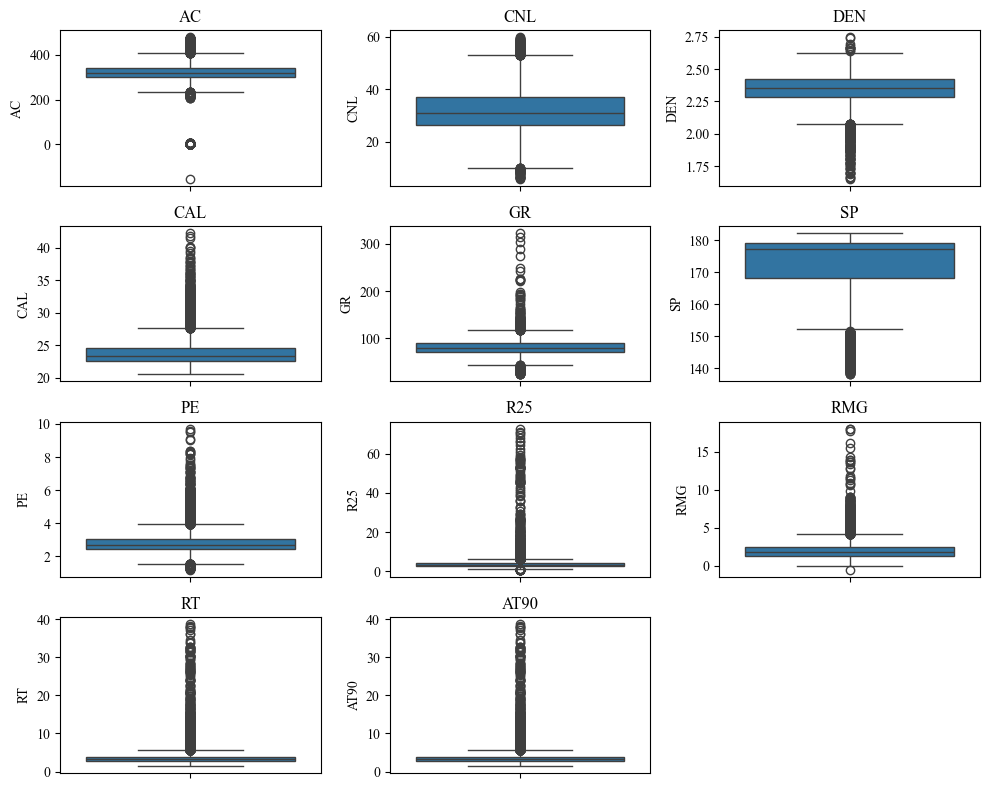

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a boxplot for the features
plt.figure(figsize=(10, 8))
for i, feature in enumerate(column_names1):
    plt.subplot(4, 3, i+1) 
    sns.boxplot(y=df_ni[feature])
    plt.title(feature)
    plt.tight_layout()  # Adjust layout

# Show the plot
plt.show()

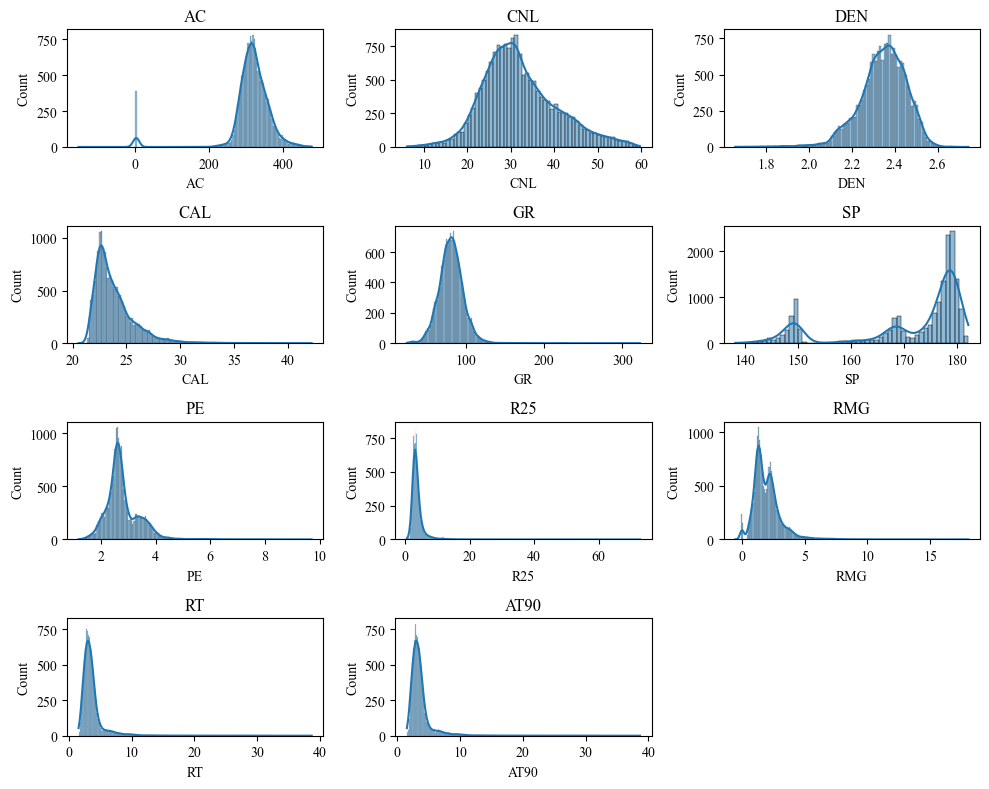

In [10]:
plt.figure(figsize=(10, 8))
for i, feature in enumerate(column_names1):
    plt.subplot(4, 3, i+1)  # Arrange plots in a 4x3 grid
    sns.histplot(df_ni[feature], kde=True)  # 'kde=True' adds the kernel density estimate
    plt.title(feature)
    plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig("IQR_no.tif", format='tif', bbox_inches='tight', dpi=600)
# Show the plot
plt.show()

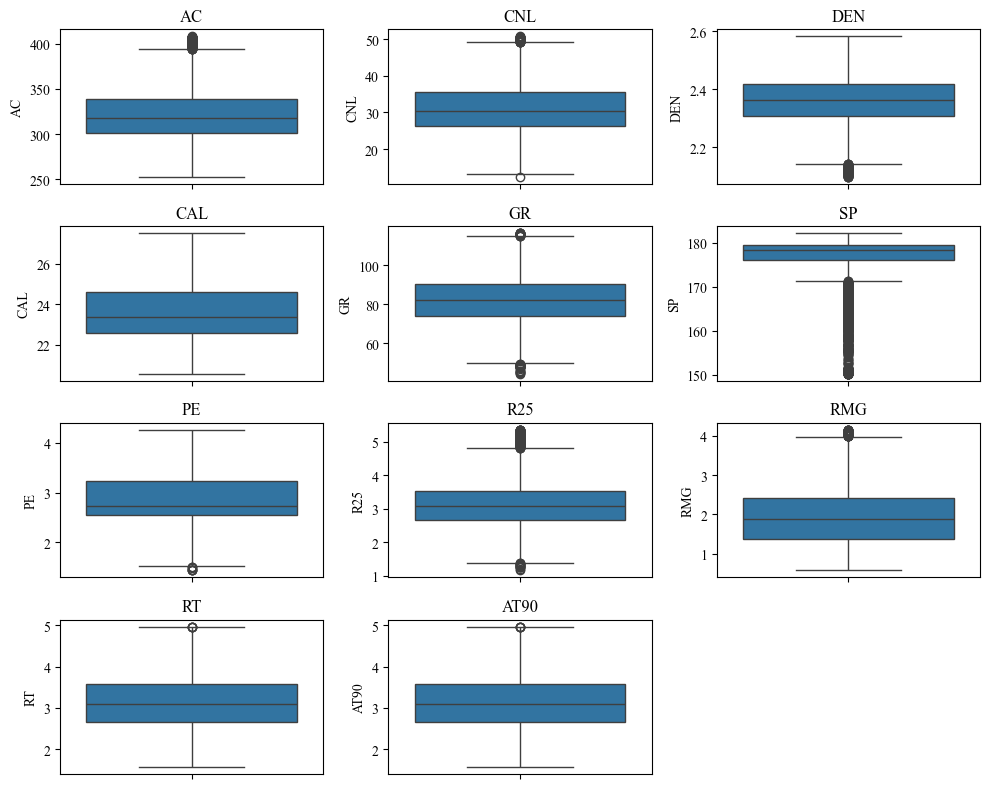

In [8]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each feature
df_cleaned = df_ni.copy()
for feature in column_names1:
    df_cleaned = remove_outliers(df_cleaned, feature)

# Create separate boxplots for each feature
plt.figure(figsize=(10, 8))
for i, feature in enumerate(column_names1):
    plt.subplot(4, 3, i+1)  # Arrange plots in a 4x3 grid
    sns.boxplot(y=df_cleaned[feature])
    plt.title(feature)
    plt.tight_layout()  # Adjust layout

# Show the plot
plt.show()


In [8]:
df_cleaned .describe()

,LABEL,AC,CNL,DEN,CAL,GR,SP,PE,R25,RMG,RT,AT90
count,10292.0,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000
mean,2.0,321.643668,31.211778,2.359288,23.706192,82.332563,176.103277,2.867476,3.143108,1.989386,3.145299,3.145299
std,0.0,27.773414,6.813140,0.084208,1.416960,12.269599,6.102568,0.500138,0.689774,0.730165,0.650828,0.650828
min,2.0,252.818000,12.403000,2.098000,20.559000,44.497000,150.259000,1.435000,1.160000,0.579000,1.570000,1.570000
25%,2.0,301.758500,26.230750,2.308000,22.588750,74.035000,176.146250,2.549000,2.671000,1.385000,2.666000,2.666000
50%,2.0,318.378500,30.471000,2.363500,23.363000,82.016500,178.442000,2.734000,3.095500,1.881000,3.098000,3.098000
75%,2.0,338.743000,35.441250,2.419000,24.588000,90.327000,179.393000,3.239000,3.533250,2.424000,3.584000,3.584000
max,2.0,408.069000,50.759000,2.582000,27.518000,116.336000,182.205000,4.262000,5.359000,4.152000,4.967000,4.967000


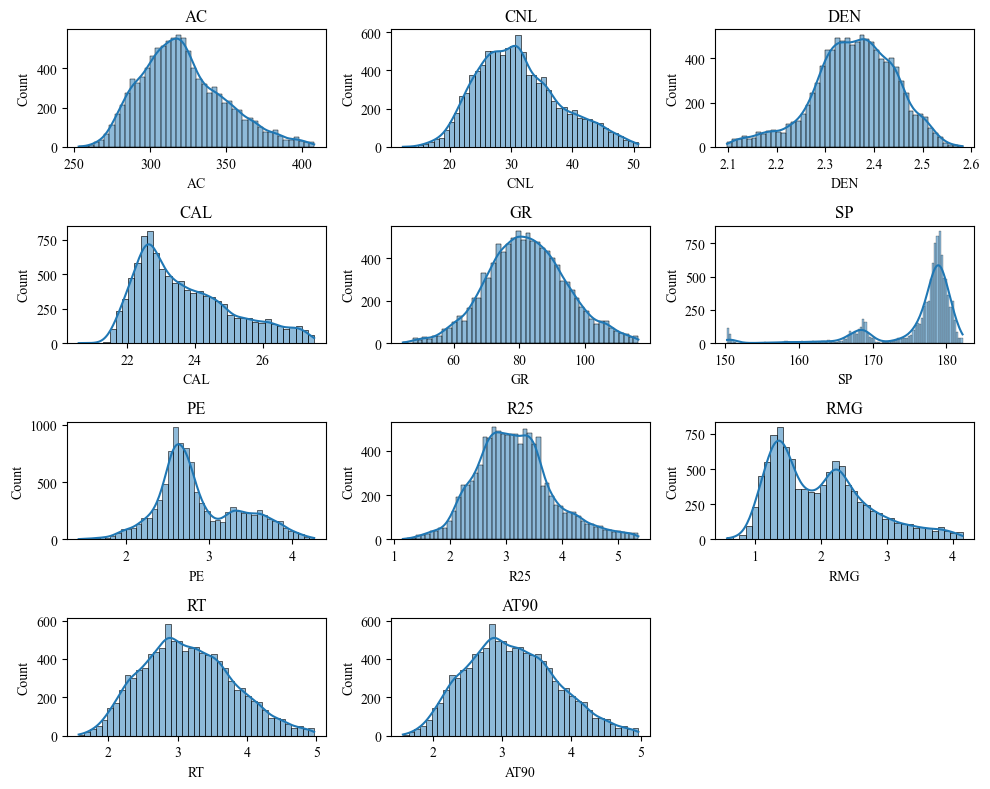

In [11]:
plt.figure(figsize=(10, 8))
for i, feature in enumerate(column_names1):
    plt.subplot(4, 3, i+1)  # Arrange plots in a 4x3 grid
    sns.histplot(df_cleaned[feature], kde=True)  # 'kde=True' adds the kernel density estimate
    plt.title(feature)
    plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig("IQR_yes.tif", format='tif', bbox_inches='tight', dpi=600)
# Show the plot
plt.show()

In [10]:
# 计算总样本数和目标采样数
total_rows = len(df_cleaned)
sample_size = total_rows // 10  # 总数的十分之一

# 系统抽样参数
step = total_rows // sample_size  # 步长
start = np.random.randint(step)    # 随机起始点（0 ~ step-1）

# 生成均匀分布的索引
indices = np.arange(start, total_rows, step)

# 确保索引不超过数据范围
indices = indices[indices < total_rows]

# 抽取样本
sampled_df_cleaned = df_cleaned.iloc[indices]

# 输出结果
print(f"原数据行数: {total_rows}")
print(f"采样行数: {len(sampled_df_cleaned)}")

原数据行数: 10292
采样行数: 1030


In [11]:
sampled_df_cleaned.describe()


,LABEL,AC,CNL,DEN,CAL,GR,SP,PE,R25,RMG,RT,AT90
count,1030.0,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,2.0,321.564174,31.212354,2.359560,23.709567,82.216450,176.070342,2.865914,3.149202,1.991353,3.153861,3.153861
std,0.0,27.789476,6.818787,0.084953,1.420703,12.133678,6.134379,0.506819,0.700041,0.737031,0.655163,0.655163
min,2.0,257.568000,14.286000,2.098000,21.458000,47.562000,150.264000,1.644000,1.319000,0.623000,1.642000,1.642000
25%,2.0,301.343000,26.317250,2.311250,22.602750,73.995250,176.130250,2.554250,2.669750,1.375500,2.691500,2.691500
50%,2.0,317.939000,30.578500,2.363000,23.380500,81.939000,178.422000,2.727000,3.111000,1.875000,3.084000,3.084000
75%,2.0,339.152750,35.264750,2.421750,24.578250,90.187000,179.369500,3.228750,3.541500,2.442250,3.604750,3.604750
max,2.0,407.286000,50.707000,2.573000,27.475000,115.715000,182.198000,4.250000,5.356000,4.150000,4.967000,4.967000


In [12]:
sampled_df_cleaned['POR_data']=0.00001
sampled_df_cleaned.describe()

,LABEL,AC,CNL,DEN,CAL,GR,SP,PE,R25,RMG,RT,AT90,POR_data
count,1030.0,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.00000
mean,2.0,321.564174,31.212354,2.359560,23.709567,82.216450,176.070342,2.865914,3.149202,1.991353,3.153861,3.153861,0.00001
std,0.0,27.789476,6.818787,0.084953,1.420703,12.133678,6.134379,0.506819,0.700041,0.737031,0.655163,0.655163,0.00000
min,2.0,257.568000,14.286000,2.098000,21.458000,47.562000,150.264000,1.644000,1.319000,0.623000,1.642000,1.642000,0.00001
25%,2.0,301.343000,26.317250,2.311250,22.602750,73.995250,176.130250,2.554250,2.669750,1.375500,2.691500,2.691500,0.00001
50%,2.0,317.939000,30.578500,2.363000,23.380500,81.939000,178.422000,2.727000,3.111000,1.875000,3.084000,3.084000,0.00001
75%,2.0,339.152750,35.264750,2.421750,24.578250,90.187000,179.369500,3.228750,3.541500,2.442250,3.604750,3.604750,0.00001
max,2.0,407.286000,50.707000,2.573000,27.475000,115.715000,182.198000,4.250000,5.356000,4.150000,4.967000,4.967000,0.00001


## 第三步，泥岩段和岩心数据进行拼接，制作成数据集

In [13]:
yanxin_data = yanxin_data.drop(['DEPTH'],axis=1)
yanxin_data.describe()

,LABEL,AC,CNL,DEN,CAL,GR,SP,PE,R25,RMG,RT,AT90,POR_data
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.643357,324.655755,30.949042,2.206902,22.563084,72.986070,161.337748,2.055392,6.521049,3.860622,8.202748,8.202748,25.883098
std,0.480692,17.547238,5.488450,0.092165,1.237936,9.351726,8.903004,0.649602,3.528509,2.045604,3.555808,3.555808,7.519927
min,0.000000,274.711000,18.737000,2.086000,21.578000,51.054000,142.646000,1.155000,2.213000,0.546000,2.328000,2.328000,4.200000
25%,0.000000,312.685000,26.077500,2.134000,21.898500,67.341000,155.398500,1.581000,3.748000,2.430000,5.340500,5.340500,22.350000
50%,1.000000,328.808000,32.187000,2.153000,22.069000,73.018000,160.730000,1.972000,5.346000,4.417000,8.631000,8.631000,29.100000
75%,1.000000,335.358000,35.009500,2.265500,22.891000,77.352000,169.579000,2.350000,8.823500,4.817000,10.326000,10.326000,30.700000
max,1.000000,372.173000,52.652000,2.451000,30.486000,97.615000,178.768000,5.394000,15.414000,14.976000,16.318000,16.318000,36.600000


In [14]:
concatenated_df = pd.concat([yanxin_data, sampled_df_cleaned], axis=0, ignore_index=True)
concatenated_df.to_excel('yanxin-niyan.xlsx',index=False)

In [15]:
XX = concatenated_df.drop(['POR_data'],axis=1)
yy = concatenated_df['POR_data']
zz = concatenated_df['LABEL']
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.3, 
                                                    random_state=42, stratify=zz)##创新点一：解决小样本学习，对每口井的类别按照比例划分，最后总的为7:3
XX   

,LABEL,AC,CNL,DEN,CAL,GR,SP,PE,R25,RMG,RT,AT90
0,0,330.783,31.119,2.146,21.742,56.680,161.908,1.975,5.275,2.972,10.090,10.090
1,0,330.594,30.832,2.148,21.726,56.114,161.885,1.976,5.346,2.999,10.263,10.263
2,0,329.816,30.279,2.147,21.686,55.371,161.827,1.976,5.516,3.051,10.615,10.615
3,0,329.211,29.889,2.147,21.663,54.732,161.798,1.976,5.638,3.108,10.869,10.869
4,0,329.152,29.989,2.146,21.649,54.568,161.780,1.973,5.729,3.142,11.017,11.017
...,...,...,...,...,...,...,...,...,...,...,...,...
1168,2,292.932,24.425,2.111,22.150,58.073,175.644,3.059,2.314,3.885,2.932,2.932
1169,2,283.852,23.709,2.104,22.333,61.248,171.722,2.948,2.599,4.132,3.038,3.038
1170,2,289.522,25.366,2.109,23.542,72.745,180.937,3.148,3.059,2.959,2.389,2.389
1171,2,295.958,23.151,2.159,24.365,81.296,180.990,3.039,3.438,2.939,2.700,2.700


In [31]:
from tabpfn import TabPFNRegressor
# 初始化TabPFN回归模型
model = TabPFNRegressor()

# 训练模型
model.fit(X_train, y_train)

TabPFNRegressor()

In [32]:
from sklearn import metrics

# 预测
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_pred_train_list = y_pred_train.tolist()
y_pred_test_list = y_pred_test.tolist()

# 计算训练集的指标
mse_train = metrics.mean_squared_error(y_train, y_pred_train_list)
rmse_train = np.sqrt(mse_train)
mae_train = metrics.mean_absolute_error(y_train, y_pred_train_list)
r2_train = metrics.r2_score(y_train, y_pred_train_list)

# 计算测试集的指标
mse_test = metrics.mean_squared_error(y_test, y_pred_test_list)
rmse_test = np.sqrt(mse_test)
mae_test = metrics.mean_absolute_error(y_test, y_pred_test_list)
r2_test = metrics.r2_score(y_test, y_pred_test_list)

print("训练集评价指标:")
print("均方误差 (MSE):", mse_train)
print("均方根误差 (RMSE):", rmse_train)
print("平均绝对误差 (MAE):", mae_train)
print("拟合优度 (R-squared):", r2_train)
print(f'-------------------------')
print("\n测试集评价指标:")
print("均方误差 (MSE):", mse_test)
print("均方根误差 (RMSE):", rmse_test)
print("平均绝对误差 (MAE):", mae_test)
print("拟合优度 (R-squared):", r2_test)

训练集评价指标:
均方误差 (MSE): 4.8210586308120655
均方根误差 (RMSE): 2.1956909233341713
平均绝对误差 (MAE): 0.684497596193713
拟合优度 (R-squared): 0.9384252769075703
-------------------------

测试集评价指标:
均方误差 (MSE): 5.123334057260132
均方根误差 (RMSE): 2.263478309430009
平均绝对误差 (MAE): 0.732991436924965
拟合优度 (R-squared): 0.9354509818860329


<Figure size 9600x7200 with 0 Axes>

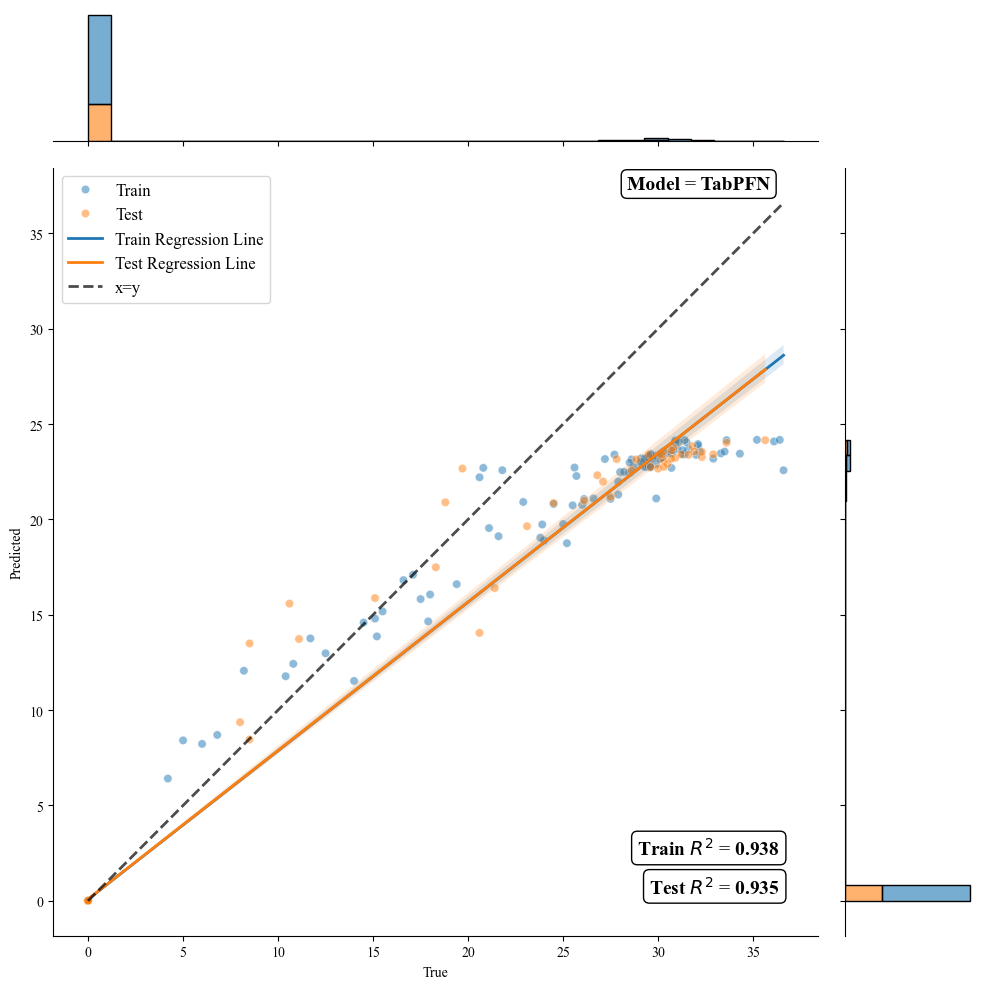

In [33]:
from sklearn import metrics

# 创建包含训练集和测试集真实值与预测值的数据框
data_train = pd.DataFrame({
    'True': y_train,
    'Predicted': y_pred_train,
    'Data Set': 'Train'
})

data_test = pd.DataFrame({
    'True': y_test,
    'Predicted': y_pred_test,
    'Data Set': 'Test'
})

data = pd.concat([data_train, data_test])

# 自定义调色板
palette = {'Train': '#1f77b4', 'Test': '#ff7f0e'}

# 创建 JointGrid 对象
plt.figure(figsize=(8, 6), dpi=1200)
g = sns.JointGrid(data=data, x="True", y="Predicted", hue="Data Set", height=10, palette=palette)

# 绘制中心的散点图
g.plot_joint(sns.scatterplot, alpha=0.5)

# 添加训练集的回归线
sns.regplot(
    data=data_train, x="True", y="Predicted", 
    scatter=False, ax=g.ax_joint, color=palette['Train'], 
    label='Train Regression Line', line_kws={'linewidth': 2}
)

# 添加测试集的回归线
sns.regplot(
    data=data_test, x="True", y="Predicted", 
    scatter=False, ax=g.ax_joint, color=palette['Test'], 
    label='Test Regression Line', line_kws={'linewidth': 2}
)

# 添加边缘的柱状图
g.plot_marginals(
    sns.histplot, kde=False, element='bars', multiple='stack', 
    alpha=0.6, bins=30
)

# 添加拟合优度文本（加粗）
ax = g.ax_joint
ax.text(0.95, 0.1, f'Train $R^2$ = {r2_train:.3f}', 
        transform=ax.transAxes, fontsize=14, fontweight='bold',
        verticalalignment='bottom', horizontalalignment='right', 
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

ax.text(0.95, 0.05, f'Test $R^2$ = {r2_test:.3f}', 
        transform=ax.transAxes, fontsize=14, fontweight='bold',
        verticalalignment='bottom', horizontalalignment='right', 
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# 在左上角添加模型名称文本（加粗）
ax.text(0.75, 0.99, 'Model = TabPFN', 
        transform=ax.transAxes, fontsize=14, fontweight='bold',
        verticalalignment='top', horizontalalignment='left', 
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# 添加中心线
ax.plot(
    [data['True'].min(), data['True'].max()], 
    [data['True'].min(), data['True'].max()], 
    c="black", alpha=0.7, linestyle='--', linewidth=2, label='x=y'
)

# 调整图例
ax.legend(fontsize=12, loc='upper left', frameon=True)

# 保存图像
plt.savefig("TrueFalse.pdf", format='pdf', bbox_inches='tight')
plt.show()

## 第四步，表格数据增强

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
seed = 42
# 加载数据集，需要将 file_path 替换为你的实际文件路径
file_path = '岩性分类\DATASET-(细砂岩为0-泥岩为2-粉砂岩为1).xlsx'
df = pd.read_excel(file_path)

# 设置标签列
y = df['LABEL']

# 删除包含中文字符的列，假设只有`岩性`列是中文字符列，如果还有其他列，可在列表中添加

# 删除标签列，因为已经单独提取出标签
df = df.drop(columns=['LABEL'])


# 按照 7:3 的比例划分数据集，test_size=0.3 表示测试集占 30%
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.05, random_state=seed,stratify=y)
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

y_train shape: (820,), y_test shape: (352,)


In [ ]:
x_few_train, _, y_few_train, _ = train_test_split(X_train, y_train, train_size=0.95, random_state=seed,stratify=y_train)
print(len(x_few_train))
few_data  =  pd.concat([x_few_train, y_few_train], axis=1, ignore_index=True)
few_data .to_excel('few_data.xlsx',index=False)

410


In [21]:
class_distribution = pd.Series(y_few_train).value_counts()
print(class_distribution)

LABEL
2    360
1     32
0     18
Name: count, dtype: int64


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, precision_score, \
    recall_score, average_precision_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import numpy as np


def tabular_model_test(x_train, y_train, x_test, y_test,
                       model_name='logistic_regression',
                       sample_weight=None, model_params=None, seed=42):
    """适用于表格结构化数据多分类任务，包含二分类、三分类及更多分类"""
    
    # 强制转换为一维标签（处理可能的隐藏维度，如 (n_samples, 1)）
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    num_classes = len(np.unique(y_train))
    print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}, num_classes: {num_classes}")

    # 训练模型（代码不变）
    if model_name == 'xgb':
        xgb_params = {
            'eval_metric': 'merror',
            'random_state': seed,
            'num_class': num_classes,
            'n_estimators': 1000,
            'learning_rate': 0.1,
            'objective': 'multi:softmax'
        }
        if model_params is not None:
            xgb_params.update(model_params)
        model = xgb.XGBClassifier(**xgb_params)
        model.fit(x_train, y_train, sample_weight=sample_weight)
    # 其他模型代码不变...

    # 预测（代码不变）
    test_pred = model.predict(x_test)
    test_pred_proba = model.predict_proba(x_test)

    # 计算评估指标（关键修改）
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred, average='weighted')
    test_f1 = f1_score(y_test, test_pred, average='weighted')
    test_recall = recall_score(y_test, test_pred, average='weighted')
    
    # 处理 average_precision_score（统一转独热矩阵）
    y_true_onehot = np.eye(num_classes)[y_test]
    test_ap = average_precision_score(y_true_onehot, test_pred_proba, average='weighted')
    
    # 处理 roc_auc_score（区分二分类和多分类）
    if num_classes == 2:
        # 二分类：使用正类概率（第二列），无需 multi_class 参数
        test_auc = roc_auc_score(y_test, test_pred_proba[:, 1])
    else:
        # 多分类：显式设置 ovr 和加权平均
        test_auc = roc_auc_score(y_test, test_pred_proba, multi_class='ovr', average='weighted')
    
    # 计算混淆矩阵（代码不变）
    test_confusion_matrix = confusion_matrix(y_test, test_pred)

    print(f'Test Accuracy: {test_accuracy}')
    print(f'Test precision: {test_precision}')
    print(f'Test F1: {test_f1}')
    print(f'Test AUC: {test_auc}')
    print(f'Test AP: {test_ap}')
    print('Test Confusion Matrix:')
    print(test_confusion_matrix)

    return test_accuracy, test_precision, test_f1, test_auc, test_ap


In [9]:
tabular_model_test(X_train, y_train, X_test, y_test, model_name='xgb')

C:\Users\UPC\AppData\Local\Temp\ipykernel_26028\3504192551.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()
C:\Users\UPC\AppData\Local\Temp\ipykernel_26028\3504192551.py:20: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


y_train shape: (820,), y_test shape: (352,), num_classes: 3
Test Accuracy: 1.0
Test precision: 1.0
Test F1: 1.0
Test AUC: 1.0
Test AP: 0.9999999999999999
Test Confusion Matrix:
[[ 15   0   0]
 [  0  28   0]
 [  0   0 309]]


(1.0, 1.0, 1.0, 1.0, 0.9999999999999999)

In [10]:
tabular_model_test(x_few_train, y_few_train, X_test, y_test, model_name='xgb')

C:\Users\UPC\AppData\Local\Temp\ipykernel_26028\3504192551.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()
C:\Users\UPC\AppData\Local\Temp\ipykernel_26028\3504192551.py:20: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


y_train shape: (410,), y_test shape: (352,), num_classes: 3
Test Accuracy: 0.9943181818181818
Test precision: 0.9945049028592375
Test F1: 0.994261078834272
Test AUC: 0.9997497799874778
Test AP: 0.9953480823154117
Test Confusion Matrix:
[[ 15   0   0]
 [  1  26   1]
 [  0   0 309]]


(0.9943181818181818,
 0.9945049028592375,
 0.994261078834272,
 0.9997497799874778,
 0.9953480823154117)

In [12]:
from smote import smote_augmentations
sample = 3000
x_synthesis, y_synthesis = smote_augmentations(x_few_train, y_few_train, 'SVMSMOTE', seed=seed,
                                              oversample_num=sample, 
                                              knn_neighbors=3)
print(type(x_synthesis))
x_synthesis = x_synthesis .drop(index=range(80))
y_synthesis = y_synthesis .drop(index=range(80))
results = tabular_model_test(x_synthesis, y_synthesis, X_test, y_test, model_name='xgb')
smote_data  =  pd.concat([x_synthesis, y_synthesis], axis=1, ignore_index=True)
smote_data .to_excel('岩性分类/SMOTE/smote_'+ str(sample)+ 'data.xlsx',index=False)

# 保存其他指标（如准确率、F1等）
metrics = [results[0], results[1], results[2], results[3], results[4]]
np.savetxt('岩性分类/SMOTE/smote_metrics'+ str(sample)+'.txt', metrics)

<class 'pandas.core.frame.DataFrame'>
y_train shape: (1651,), y_test shape: (352,), num_classes: 3


C:\Users\UPC\AppData\Local\Temp\ipykernel_26028\3504192551.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()
C:\Users\UPC\AppData\Local\Temp\ipykernel_26028\3504192551.py:20: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


Test Accuracy: 0.9914772727272727
Test precision: 0.9928977272727273
Test F1: 0.991623460159052
Test AUC: 0.9998968105885762
Test AP: 0.9983168485925837
Test Confusion Matrix:
[[ 15   0   0]
 [  3  25   0]
 [  0   0 309]]


In [13]:
from smote import smote_augmentations
sample = 3000
x_synthesis, y_synthesis = smote_augmentations(x_few_train, y_few_train, 'SMOTETomek', seed=seed,
                                              oversample_num=sample, 
                                              knn_neighbors=3)
x_synthesis = x_synthesis .drop(index=range(80))
y_synthesis = y_synthesis .drop(index=range(80))
results = tabular_model_test(x_synthesis, y_synthesis, X_test, y_test, model_name='xgb')
smote_data  =  pd.concat([x_synthesis, y_synthesis], axis=1, ignore_index=True)
smote_data .to_excel('岩性分类/SMOTETomek/SMOTETomek_'+ str(sample)+ 'data.xlsx',index=False)
# 假设 tabular_model_test 返回测试结果的字典或数组
# 保存其他指标（如准确率、F1等）
metrics = [results[0], results[1], results[2], results[3], results[4]]
np.savetxt('岩性分类/SMOTETomek/SMOTETomek_metrics'+ str(sample)+'.txt', metrics)

C:\Users\UPC\AppData\Local\Temp\ipykernel_26028\3504192551.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()
C:\Users\UPC\AppData\Local\Temp\ipykernel_26028\3504192551.py:20: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


y_train shape: (2919,), y_test shape: (352,), num_classes: 3
Test Accuracy: 0.9914772727272727
Test precision: 0.9928977272727273
Test F1: 0.9917571483708953
Test AUC: 0.999868814671609
Test AP: 0.9988754734848485
Test Confusion Matrix:
[[ 15   0   0]
 [  2  26   0]
 [  1   0 308]]


In [57]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import KNeighborsClassifier

ada = ADASYN(sampling_strategy={1: 1000})


ADASYN_data  =  pd.concat([x_synthesis, y_synthesis], axis=1, ignore_index=True)
ADASYN_data  .to_excel('ADASYN/ADASYN_'+ '1000data.xlsx',index=False)
# ADASYN_data .to_excel('SMOTE/smote_'+ str(sample)+ 'data.xlsx',index=False)

In [47]:
from mixup import mixup_augmentation_with_weight
method = 'vanilla'
sample = 160
x_synthesis, y_synthesis, sample_weight = mixup_augmentation_with_weight(
            x_few_train, y_few_train, oversample_num=sample, alpha=1, beta=1, mixup_type=method, seed=seed, rebalanced_ita=1)
results = tabular_model_test(x_synthesis, y_synthesis, X_test, y_test, model_name='xgb', sample_weight=sample_weight)
vanilla_data  =  pd.concat([pd.DataFrame(x_synthesis), pd.DataFrame(y_synthesis)], axis=1, ignore_index=True)
vanilla_data .to_excel('vanilla/vanilla_'+str(sample)+ 'data.xlsx',index=False)


do vanilla mixup....
positive: 157 negative: 45
y_train shape: (202,), y_test shape: (469,), num_classes: 2
Test Accuracy: 0.9936034115138592
Test precision: 0.9936496519125543
Test F1: 0.9935285731636506
Test AUC: 1.0
Test AP: 1.0
Test Confusion Matrix:
[[ 54   3]
 [  0 412]]


In [21]:
from mixup import mixup_augmentation_with_weight
method = 'noisy'
sample = 200
x_synthesis, y_synthesis, sample_weight = mixup_augmentation_with_weight(
            x_few_train, y_few_train, oversample_num=sample, alpha=1, beta=1, mixup_type=method, seed=seed, rebalanced_ita=1)
noisy_data  =  pd.concat([pd.DataFrame(x_synthesis), pd.DataFrame(y_synthesis)], axis=1, ignore_index=True)
noisy_data.to_excel('noisy/noisy_'+ str(sample)+ 'data.xlsx',index=False)
results = tabular_model_test(x_synthesis, y_synthesis, X_test, y_test, model_name='xgb', sample_weight=sample_weight)
metrics = [results[0], results[1], results[2], results[3], results[4]]
np.savetxt('noisy/noisy_metrics'+ str(sample)+'.txt', metrics)



do noisy mixup....
positive: 235 negative: 67
y_train shape: (302,), y_test shape: (469,), num_classes: 2
Test Accuracy: 0.9658848614072495
Test precision: 0.9654348247469597
Test F1: 0.9656215635761007
Test AUC: 0.8861778231987736
Test AP: 0.9483866694264445
Test Confusion Matrix:
[[ 48   9]
 [  7 405]]


In [44]:
from mixup import mixup_augmentation_with_weight
method = 'rebalanced'
sample = 120
x_synthesis, y_synthesis, sample_weight = mixup_augmentation_with_weight(
            x_few_train, y_few_train, oversample_num=sample, alpha=1, beta=1, mixup_type=method, seed=seed, rebalanced_ita=0.7)
rebalanced_data  =  pd.concat([pd.DataFrame(x_synthesis), pd.DataFrame(y_synthesis)], axis=1, ignore_index=True)
rebalanced_data.to_excel('Rebalanced/rebalanced_'+ str(sample)+ 'data.xlsx',index=False)
results = tabular_model_test(x_synthesis, y_synthesis, X_test, y_test, model_name='xgb', sample_weight=sample_weight)

# 保存其他指标（如准确率、F1等）
metrics = [results[0], results[1], results[2], results[3], results[4]]
np.savetxt('Rebalanced/Rebalanced_metrics'+ str(sample)+'.txt', metrics)

do rebalanced mixup....
positive: 157 negative: 45
y_train shape: (202,), y_test shape: (469,), num_classes: 2
Test Accuracy: 0.9936034115138592
Test precision: 0.9936496519125543
Test F1: 0.9935285731636506
Test AUC: 1.0
Test AP: 1.0
Test Confusion Matrix:
[[ 54   3]
 [  0 412]]


In [11]:
from sdv_synthesizer import sdv_synthesiss3, sdv_synthesis_one_gan, sdv_synthesis_cvae
method = 'CTGAN'
sample = 3000
# 检查实际标签
print("实际类别标签:", np.unique(y_few_train))

# 调整后的自定义比例
custom_ratios = {
    0: 0.3,   # 键改为整数
    1: 0.3, 
    2: 0.4
}

# 调用函数
x_synthesis, y_synthesis = sdv_synthesiss3(
    x_few_train,
    y_few_train,
    generator_type=method,
    oversample_num=sample,
    class_ratios=custom_ratios,  # 使用修正后的字典
    seed=42
)
print(y_synthesis)
CTGAN_data  =  pd.concat([x_synthesis, y_synthesis], axis=1, ignore_index=True)
CTGAN_data .to_excel('岩性分类/CTGAN/CTGAN_'+ str(sample)+ 'data.xlsx',index=False)

实际类别标签: [0 1 2]
0       2
1       1
2       2
3       0
4       2
       ..
2995    1
2996    1
2997    1
2998    1
2999    0
Name: label, Length: 3000, dtype: int64


In [12]:
results=tabular_model_test(x_synthesis, y_synthesis, X_test, y_test, model_name='xgb')
metrics = [results[0], results[1], results[2], results[3], results[4]]
np.savetxt('岩性分类/CTGAN/CTGAN_metrics'+ str(sample)+'.txt', metrics)

y_train shape: (3000,), y_test shape: (352,), num_classes: 3
Test Accuracy: 0.9829545454545454
Test precision: 0.9828379953379954
Test F1: 0.9826396663681147
Test AUC: 0.9997936211771523
Test AP: 0.9968509263699734
Test Confusion Matrix:
[[ 11   4   0]
 [  2  26   0]
 [  0   0 309]]


In [15]:
#**三分类**

from sdv_synthesizer import sdv_synthesiss, sdv_synthesis_cvae
method = 'TVAE'
sample = 3000

x_synthesis, y_synthesis = sdv_synthesiss(
            x_few_train, y_few_train, method, oversample_num=sample,
            seed=seed, init_synthesizer=True, positive_ratio=0.5,
        )
results=tabular_model_test(x_synthesis, y_synthesis, X_test, y_test, model_name='xgb')





y_train shape: (3000,), y_test shape: (352,), num_classes: 3
Test Accuracy: 0.9829545454545454
Test precision: 0.9828379953379954
Test F1: 0.9826396663681147
Test AUC: 0.9997936211771523
Test AP: 0.9968509263699734
Test Confusion Matrix:
[[ 11   4   0]
 [  2  26   0]
 [  0   0 309]]


In [ ]:
# **二分类**
from sdv_synthesizer import sdv_synthesiss, sdv_synthesis_cvae
method = 'TVAE'
sample = 3000
# 调整后的自定义比例
custom_ratios = {
    0: 0.3,   # 键改为整数
    1: 0.3, 
    2: 0.4
}

# 调用函数
x_synthesis, y_synthesis = sdv_synthesiss3(
    x_few_train,
    y_few_train,
    generator_type=method,
    oversample_num=sample,
    class_ratios=custom_ratios,  # 使用修正后的字典
    seed=42
)
results=tabular_model_test(x_synthesis, y_synthesis, X_test, y_test, model_name='xgb')

In [16]:

TVAE_data  =  pd.concat([x_synthesis, y_synthesis], axis=1, ignore_index=True)
TVAE_data .to_excel('岩性分类/TVAE/TVAE_'+ str(sample)+ 'data.xlsx',index=False)
metrics = [results[0], results[1], results[2], results[3], results[4]]
np.savetxt('岩性分类/TVAE/TVAE_metrics'+ str(sample)+'.txt', metrics)

In [25]:
from sdv_synthesizer import sdv_synthesis, sdv_synthesis_cvae
method = 'ConditionalTVAE'

x_synthesis, y_synthesis = sdv_synthesis_cvae(
            x_few_train, y_few_train, method, oversample_num=1000,
            seed=seed, init_synthesizer=True, positive_ratio=0.5,
        )
tabular_model_test(x_synthesis, y_synthesis, X_test, y_test, model_name='xgb')
ConditionalTVAE_data  =  pd.concat([x_synthesis, y_synthesis], axis=1, ignore_index=True)
ConditionalTVAE_data .to_excel('ConditionalTVAE_data.xlsx',index=False)

positive generator init, ConditionalTVAE
y_train shape: (1000,), y_test shape: (469,), num_classes: 2
Test Accuracy: 0.9744136460554371
Test precision: 0.9751377881482077
Test F1: 0.9730922005308587
Test AUC: 0.8947368421052632
Test AP: 0.952661076367483
Test Confusion Matrix:
[[ 45  12]
 [  0 412]]


In [17]:
# **三分类**
from sdv_synthesizer import sdv_synthesis, sdv_synthesis_cvae
method = 'DeltaTVAE'
sample = 3000
# 调整后的自定义比例
custom_ratios = {
    0: 0.3,   # 键改为整数
    1: 0.3, 
    2: 0.4
}

# 调用函数
x_synthesis, y_synthesis = sdv_synthesiss3(
    x_few_train,
    y_few_train,
    generator_type=method,
    oversample_num=sample,
    class_ratios=custom_ratios,  # 使用修正后的字典
    seed=42
)
results=tabular_model_test(x_synthesis, y_synthesis, X_test, y_test, model_name='xgb')
results=tabular_model_test(x_synthesis, y_synthesis, X_test, y_test, model_name='xgb')
TVAE_data  =  pd.concat([x_synthesis, y_synthesis], axis=1, ignore_index=True)
TVAE_data .to_excel('岩性分类/DeltaTVAE/DeltaTVAE_'+ str(sample)+ 'data.xlsx',index=False)
metrics = [results[0], results[1], results[2], results[3], results[4]]
np.savetxt('岩性分类/DeltaTVAE/DeltaTVAE_metrics'+ str(sample)+'.txt', metrics)

y_train shape: (3000,), y_test shape: (352,), num_classes: 3
Test Accuracy: 0.9829545454545454
Test precision: 0.9828379953379954
Test F1: 0.9826396663681147
Test AUC: 0.9997936211771523
Test AP: 0.9968509263699734
Test Confusion Matrix:
[[ 11   4   0]
 [  2  26   0]
 [  0   0 309]]
y_train shape: (3000,), y_test shape: (352,), num_classes: 3
Test Accuracy: 0.9829545454545454
Test precision: 0.9828379953379954
Test F1: 0.9826396663681147
Test AUC: 0.9997936211771523
Test AP: 0.9968509263699734
Test Confusion Matrix:
[[ 11   4   0]
 [  2  26   0]
 [  0   0 309]]


In [ ]:
# **2分类**
from sdv_synthesizer import sdv_synthesis, sdv_synthesis_cvae
method = 'DeltaTVAE'
sample = 3000
x_synthesis, y_synthesis = sdv_synthesiss(
            x_few_train, y_few_train, method, oversample_num=sample,
            seed=seed, init_synthesizer=True, positive_ratio=0.5,
        )
results=tabular_model_test(x_synthesis, y_synthesis, X_test, y_test, model_name='xgb')
TVAE_data  =  pd.concat([x_synthesis, y_synthesis], axis=1, ignore_index=True)
TVAE_data .to_excel('DeltaTVAE/DeltaTVAE_'+ str(sample)+ 'data.xlsx',index=False)
metrics = [results[0], results[1], results[2], results[3], results[4]]
np.savetxt('DeltaTVAE/DeltaTVAE_metrics'+ str(sample)+'.txt', metrics)

In [18]:
import sys
sys.path.insert(0,r'E:\Code\TabPFN\TabPFN\tab_ddpmm')
# from tab_ddpm.synthesis import ddpm_synthesis
from tab_ddpmm.synthesis import ddpm_synthesis

method = "DDPM"
sample = 3000
x_synthesis, y_synthesis = ddpm_synthesis(
            x_few_train, y_few_train, method, oversample_num=sample, seed=seed, init_synthesizer=True, positive_ratio=None, train_steps=1000)


mlp
Step 500/1000 MLoss: 0.0 GLoss: 0.2743 Sum: 0.2743
Step 1000/1000 MLoss: 0.0 GLoss: 0.2266 Sum: 0.2266
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0


In [19]:

x_synthesis_df = pd.DataFrame(x_synthesis)
y_synthesis_df = pd.DataFrame(y_synthesis)
DDPM_data  =  pd.concat([x_synthesis_df, y_synthesis_df], axis=1, ignore_index=True)
DDPM_data .to_excel('TabDDPM/TabDDPM_'+ str(sample)+ 'data.xlsx',index=False)
results=tabular_model_test(x_synthesis, y_synthesis, X_test, y_test, model_name='xgb')
metrics = [results[0], results[1], results[2], results[3], results[4]]
np.savetxt('TabDDPM/TabDDPM__metrics'+ str(sample)+'.txt', metrics)

y_train shape: (3000,), y_test shape: (469,), num_classes: 2
Test Accuracy: 0.9211087420042644
Test precision: 0.9271294425362794
Test F1: 0.9235594116376499
Test AUC: 0.9194557996934083
Test AP: 0.9644831714202114
Test Confusion Matrix:
[[ 43  14]
 [ 23 389]]
